## Default data analysis

### Imports

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from collections import Counter
from imblearn.prototype import SVBPS
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, TomekLinks
from kNearestNeighbors import kNearestNeighbors
from matplotlib import pyplot
from numpy import where
from sklearn.datasets import load_iris, make_classification
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder, StandardScaler


pd.set_option('display.max_columns', None)

### Read data

In [5]:
file_path = 'csgo_round_snapshots.csv'
df_csgo = pd.read_csv(file_path)
print("CSGO dataset size:", df_csgo.shape)

file_path = 'citrus.csv'
df_citrus = pd.read_csv(file_path)
print("Citrus dataset size:", df_citrus.shape)

CSGO dataset size: (122410, 97)
Citrus dataset size: (10000, 6)


### Info

In [4]:
memory_usage = df_csgo.memory_usage(deep=True).sum()
print("Memory usage of df_csgo: {:.2f} MB".format(memory_usage / (1024*1024)))

memory_csgo=memory_usage / (1024*1024)

Memory usage of df_csgo: 102.43 MB


In [5]:
memory_usage = df_citrus.memory_usage(deep=True).sum()
print("Memory usage of df_citrus: {:.2f} MB".format(memory_usage / (1024*1024)))


Memory usage of df_citrus: 1.00 MB


In [5]:
df_csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [6]:
df_citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df_csgo.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,0.004011,0.001773,0.110138,0.004738,0.0,0.000792,0.011045,0.110301,0.006919,3.310195,0.000008,0.0,0.063818,0.002729,1.076236,0.052733,0.007557,0.107311,0.004403,0.000049,0.001462,0.002753,0.002034,0.001952,0.146998,0.005645,0.0,0.000008,0.000980,0.000106,0.000163,0.000155,0.0,0.000057,0.0,0.000139,0.000719,0.000008,0.239147,0.824941,0.059505,0.020440,0.046426,0.036468,0.007557,0.000261,0.440675,0.380868,0.061751,0.009386,3.179789,0.122400,0.236974,0.291618,0.174046,0.004934,0.008120,0.028323,0.899101,0.438257,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,0.063206,0.042067,0.388980,0.070780,0.0,0.037148,0.112130,0.405933,0.086935,1.625785,0.002858,0.0,0.262884,0.053096,1.219112,0.247009,0.094191,0.41

In [8]:
df_citrus.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [9]:
nan_counts = df_csgo.isna().sum()

# Print the number of NaN values in each column
print("Number of NaN values in each column csgo dataset:")
print(nan_counts)

Number of NaN values in each column:
time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64


In [22]:
nan_counts = df_citrus.isna().sum()

# Print the number of NaN values in each column
print("Number of NaN values in each column citrus dataset:")
print(nan_counts)

Number of NaN values in each column citrus dataset:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64


### CSGO data meaning

In [39]:
df_csgo.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


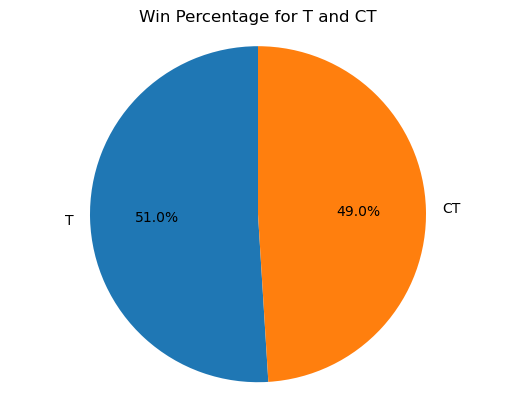

In [11]:

# Count the occurrences of each value in the 'round_winner' column
round_winner_counts = df_csgo['round_winner'].value_counts()

# Plot the pie chart with percentage labels
fig, ax = plt.subplots()
ax.pie(round_winner_counts, labels=['T', 'CT'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Win Percentage for T and CT')
plt.show()

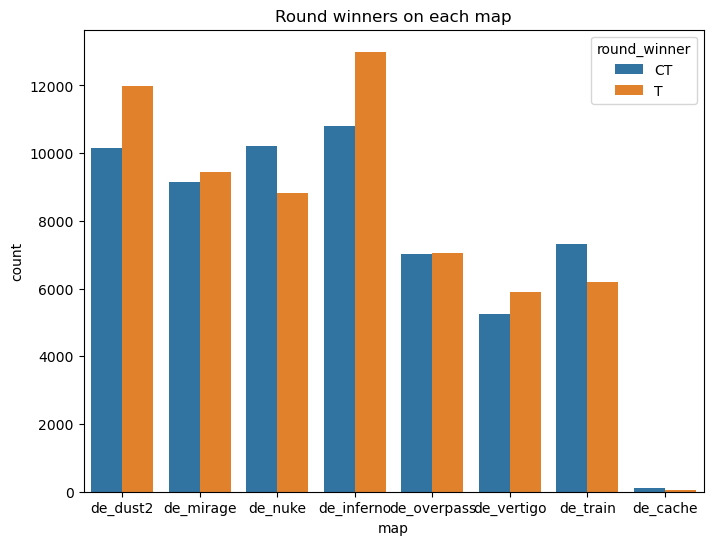

In [12]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=df_csgo)
ax.set(title='Round winners on each map')
plt.show()

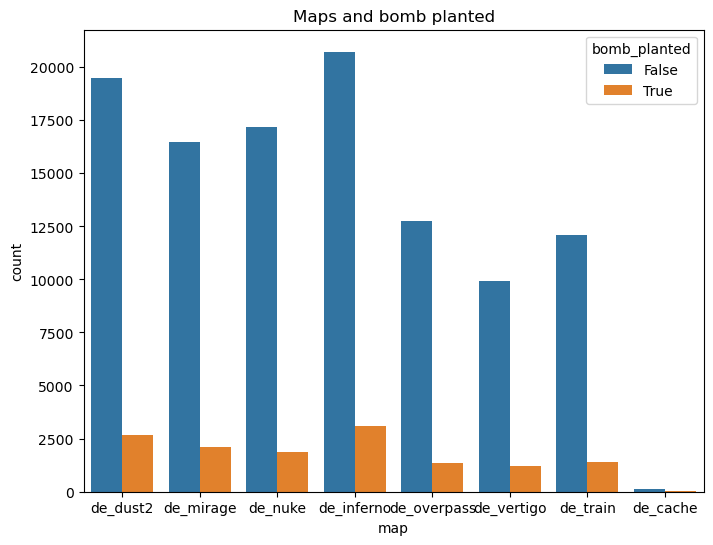

In [13]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df_csgo)
ax.set(title='Maps and bomb planted')
plt.show()

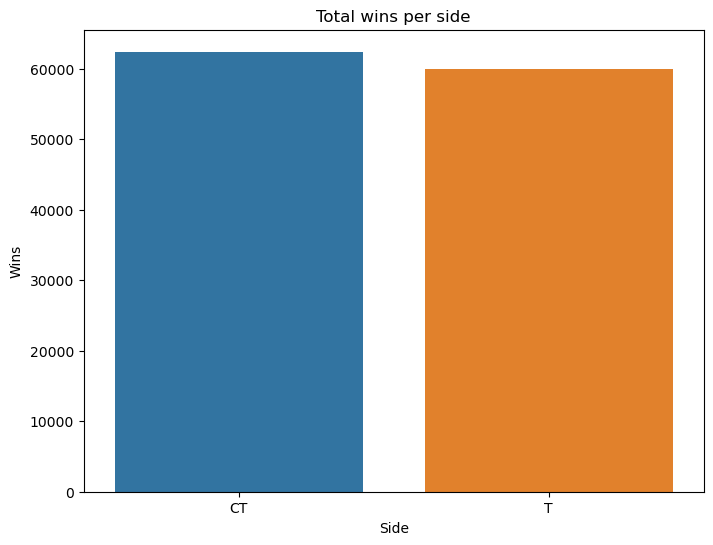

In [14]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df_csgo['round_winner'].unique(), y=df_csgo['round_winner'].value_counts())
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

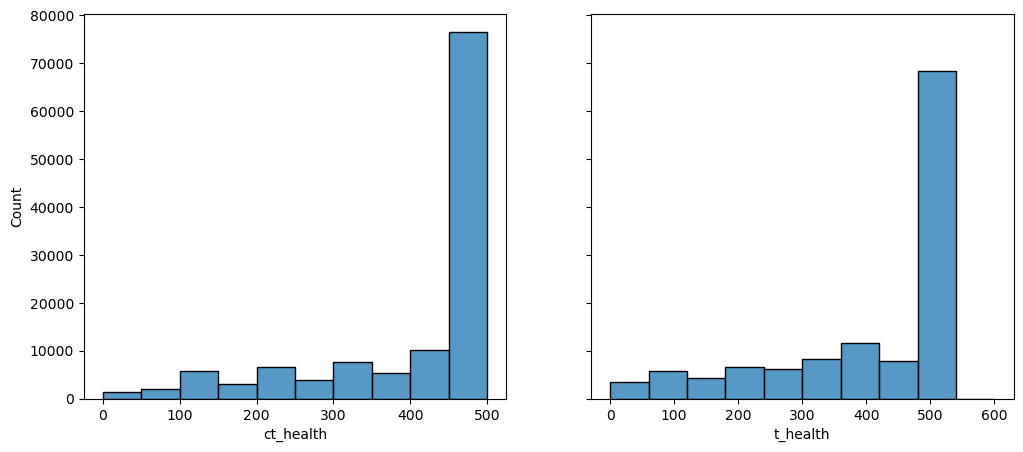

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.histplot(df_csgo['ct_health'], bins=10, ax=ax1);
sns.histplot(df_csgo['t_health'], bins=10, ax=ax2);

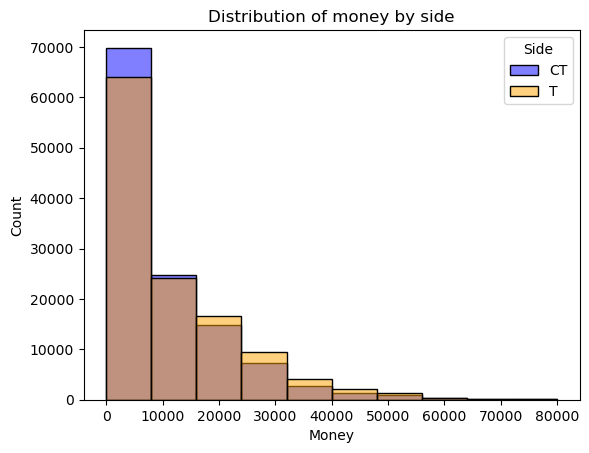

In [16]:
sns.histplot(data=df_csgo, x="ct_money", bins=10, color="blue", alpha=0.5)
sns.histplot(data=df_csgo, x="t_money", bins=10, color="orange", alpha=0.5)
plt.xlabel("Money")
plt.ylabel("Count")
plt.title("Distribution of money by side")
plt.legend(title="Side", loc="upper right", labels=["CT", "T"])
plt.show()


<AxesSubplot: xlabel='t_score', ylabel='Density'>

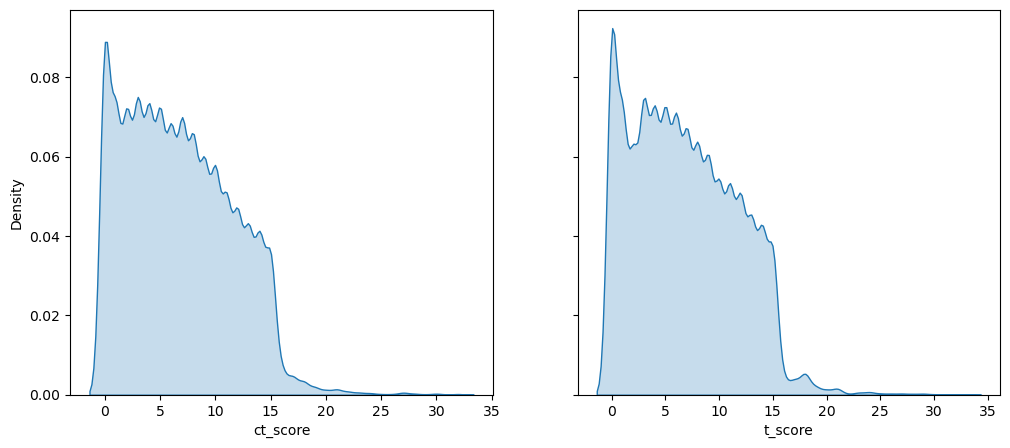

In [18]:
# Plot the distribution of scores
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.kdeplot(df_csgo['ct_score'], fill=True, ax=ax1)
sns.kdeplot(df_csgo['t_score'], fill=True, ax=ax2)

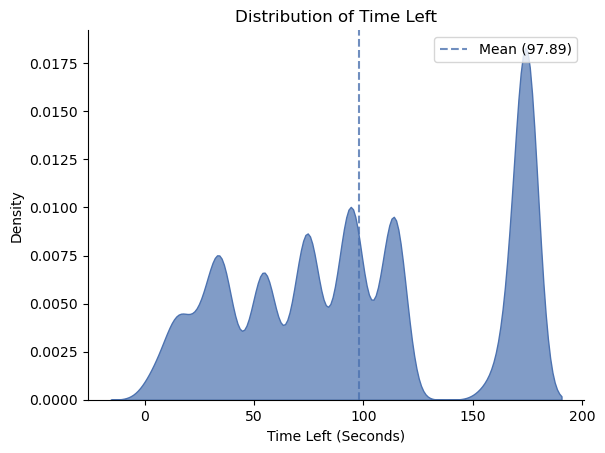

In [19]:
# Set the color palette
colors = ["#4c72b0"]

# Create the plot
sns.kdeplot(data=df_csgo, x="time_left", fill=True, color=colors[0], alpha=0.7)

# Add vertical line to indicate the mean time left
mean_time = df_csgo["time_left"].mean()
plt.axvline(x=mean_time, color=colors[0], linestyle="--", label=f"Mean ({mean_time:.2f})", alpha=0.8)

# Add labels and legend
plt.xlabel("Time Left (Seconds)")
plt.ylabel("Density")
plt.title("Distribution of Time Left")
plt.legend(loc="upper right")

# Remove the top and right spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()


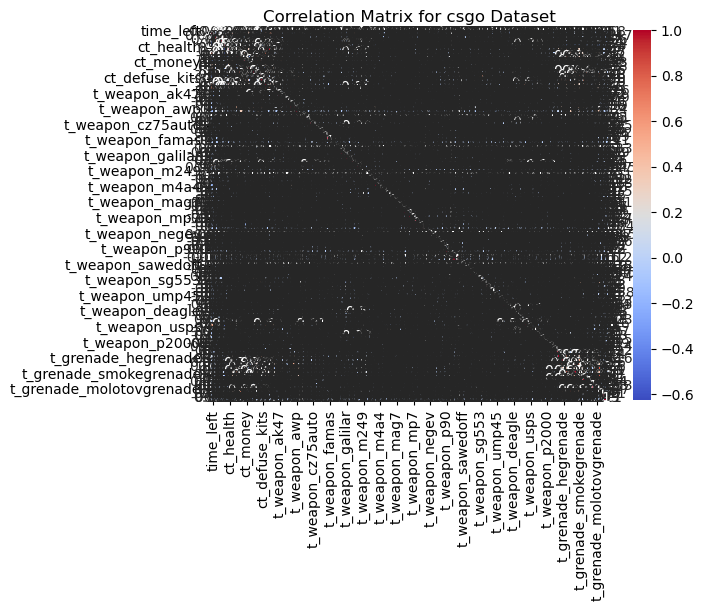

In [38]:
# Compute the correlation matrix
corr = df_csgo.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for csgo Dataset')
plt.show()

### Citrus data meaning

In [26]:
df_citrus.head(5)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


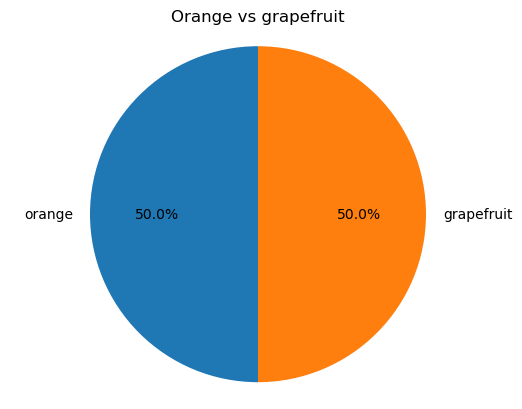

In [25]:
# Count the occurrences of each value in the 'round_winner' column
citrus_counts = df_citrus['name'].value_counts()

# Plot the pie chart with percentage labels
fig, ax = plt.subplots()
ax.pie(citrus_counts, labels=['orange', 'grapefruit'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Orange vs grapefruit')
plt.show()

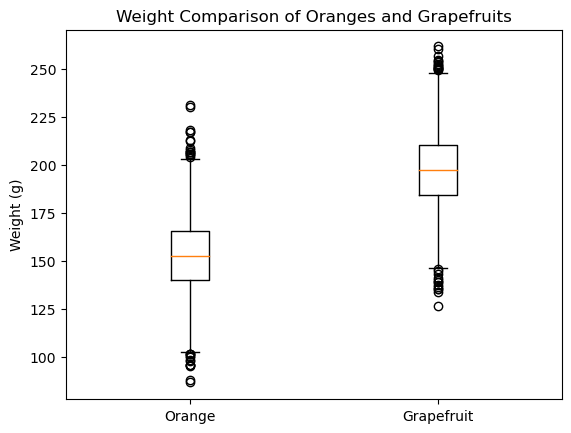

In [32]:
orange_data = df_citrus[df_citrus['name'] == 'orange']
grapefruit_data = df_citrus[df_citrus['name'] == 'grapefruit']

plt.boxplot([orange_data['weight'], grapefruit_data['weight']])
plt.xticks([1, 2], ['Orange', 'Grapefruit'])
plt.ylabel('Weight (g)')
plt.title('Weight Comparison of Oranges and Grapefruits')
plt.show()

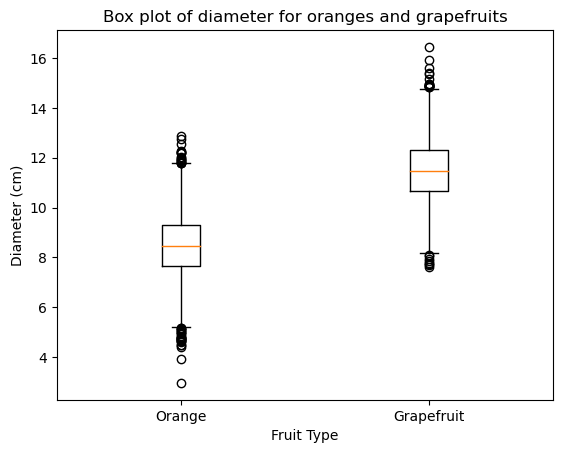

In [36]:
orange_data = df_citrus[df_citrus['name'] == 'orange']
grapefruit_data = df_citrus[df_citrus['name'] == 'grapefruit']

plt.boxplot([orange_data['diameter'], grapefruit_data['diameter']])
plt.xticks([1, 2], ['Orange', 'Grapefruit'])
plt.xlabel('Fruit Type')
plt.ylabel('Diameter (cm)')
plt.title('Box plot of diameter for oranges and grapefruits')
plt.show()

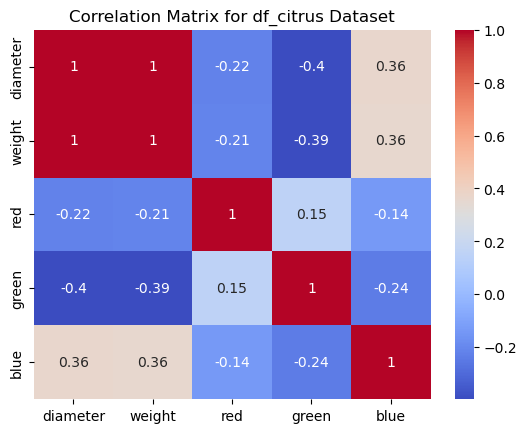

In [37]:
# Compute the correlation matrix
corr = df_citrus.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for df_citrus Dataset')
plt.show()

### CSGO data cleaning

There isn't removing of duplicates and outliers, beause main idea is to see if instance selection algorithms are doing that.

In [6]:
# Count the number of duplicate rows
duplicate_count = df_csgo.duplicated().sum()

# Print the number of duplicates
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 4962


In [7]:
before_count = len(df_csgo)

# Drop duplicates and assign the result back to df
df_dropped = df_csgo.drop_duplicates()

# Count the number of rows after dropping duplicates
after_count = len(df_dropped)

# Print the number of duplicates and the difference in number of instances
print(f'Number of duplicate rows: {before_count - after_count}')
print("Before dropping:", before_count)
print("After dropping:", after_count)

Number of duplicate rows: 4962
Before dropping: 122410
After dropping: 117448


#### Data encoding

In [8]:
# Perform one-hot encoding on the 'map' column
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df_csgo[['map']])
one_hot_columns = [f'map_{cat}' for cat in one_hot_encoder.categories_[0]]
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Add the one-hot encoded columns to the original DataFrame and drop the 'map' column
df_csgo = pd.concat([df_csgo, one_hot_df], axis=1).drop(columns=['map'])

# Perform label encoding on the 'round_winner' column
label_encoder = LabelEncoder()
df_csgo['round_winner'] = label_encoder.fit_transform(df_csgo['round_winner'])

df_csgo.head()


c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Find and drop "constant" features.

In [9]:

# Find the constant features
constant_features = df_csgo.columns[df_csgo.var() == 0]

# Drop the constant features
df_csgo = df_csgo.drop(columns=constant_features)

# Print the new shape of the DataFrame
print("New shape:", df_csgo.shape)

New shape: (122410, 98)


In [10]:
constant_features = df_csgo.columns[df_csgo.var() == 0]
print(constant_features)

Index([], dtype='object')


In [11]:
print("New shape:", df_csgo.shape)

New shape: (122410, 98)


After removing of constant columns, dataset is reduced for 12%

In [15]:
memory_usage = df_csgo.memory_usage(deep=True).sum()
print("Memory usage of df_csgo: {:.2f} MB".format(memory_usage / (1024*1024)))

Memory usage of df_csgo: 90.24 MB


### Citrus data cleaning

In [12]:
# Count the number of duplicate rows
duplicate_count = df_citrus.duplicated().sum()

# Print the number of duplicates
print(f'Number of duplicate rows citrus: {duplicate_count}')

Number of duplicate rows citrus: 0


In [7]:
# Perform label encoding on the 'name' column
label_encoder = LabelEncoder()
df_citrus['name'] = label_encoder.fit_transform(df_citrus['name'])

df_citrus.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


## Algorithms

### default

In [75]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import StandardScaler, Normalizer
from imblearn.under_sampling import (
    CondensedNearestNeighbour,
    NeighbourhoodCleaningRule,
    TomekLinks,
    EditedNearestNeighbours,
)

def under_sampling_evaluation(X, y):
    # Define under-sampling techniques
    under_sampling_techniques = [
        ("Original", None),
        ("CondensedNN", CondensedNearestNeighbour(random_state=42, n_neighbors=1, n_seeds_S=1, n_jobs=-1)),
        ("NeighbourhoodCleaningRule", NeighbourhoodCleaningRule(n_jobs=-1)),
        ("TomekLinks", TomekLinks(n_jobs=-1)),
        ("EditedNearestNeighbours", EditedNearestNeighbours(n_jobs=-1)),
    ]

    # Scale and normalize the data
    X_scaled = StandardScaler().fit_transform(X)
    X_normalized = Normalizer().fit_transform(X_scaled)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train_df = pd.DataFrame(X_train, columns=X.columns)

    results = {}

    for technique_name, technique in under_sampling_techniques:
        start_time = time.time()
        
        # Apply under-sampling technique to the train set
        if technique:
            # Limit the number of instances to 3000 for CondensedNearestNeighbour algorithm
            if technique_name == "CondensedNN" and X_train.shape[0] > 3000:
                X_train_resampled, y_train_resampled = technique.fit_resample(X_train[:3000], y_train[:3000])
            else:
                X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train

        num_instances_start = X_train.shape[0]
        num_instances_end = X_train_resampled.shape[0]
        percentage_instances_end = (num_instances_end / num_instances_start) * 100

        num_duplicated_start = X_train_df.duplicated().sum()
        num_duplicated_end = pd.DataFrame(X_train_resampled, columns=X.columns).duplicated().sum()

        # Train a k-NN classifier and evaluate the results
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train_resampled, y_train_resampled)

        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        elapsed_time = time.time() - start_time

        # Save the results in a dictionary
        results[technique_name] = {
            "time": elapsed_time,
            "accuracy": accuracy,
            "precision": report["weighted avg"]["precision"],
            "recall": report["weighted avg"]["recall"],
            "f1-score": report["weighted avg"]["f1-score"],
            "num_instances_start": num_instances_start,
            "num_instances_end": num_instances_end,
            "percentage_instances_end": percentage_instances_end,
            "num_duplicated_start": num_duplicated_start,
            "num_duplicated_end": num_duplicated_end,
        }

    results_df = pd.DataFrame(results).T
    sorted_results = results_df.sort_values(by=["time", "accuracy", "num_instances_end"], ascending=[True, False, True])

    return sorted_results.head(10)




In [ ]:
X = df_citrus.drop('name', axis=1)  # Feature columns
y = df_citrus['name']  # Target column
under_sampling_evaluation(X, y)

In [ ]:
X = df_csgo.drop('round_winner', axis=1)  # Feature columns
y = df_csgo['round_winner']  # Target column
under_sampling_evaluation(X, y)

### Improved function for comparing of algorithms

In [2]:
from imblearn.under_sampling import (
    CondensedNearestNeighbour,
    NeighbourhoodCleaningRule,
    TomekLinks,
    EditedNearestNeighbours,
)
from imblearn.combine import SMOTEENN # Not the same library as other algorithms


def evaluate_under_sampling_technique(X, y, technique_name):
    # Map technique name to the actual technique object
    techniques = {
        "Original": None,
        "CNN": CondensedNearestNeighbour(random_state=42, n_neighbors=1, n_seeds_S=1, n_jobs=-1),
        "TomekLinks": TomekLinks(n_jobs=-1),
        "ENN": EditedNearestNeighbours(n_jobs=-1),
        "SMOTEENN": SMOTEENN(random_state=42, n_jobs=-1),
        "NCR": NeighbourhoodCleaningRule(n_jobs=-1),
    }

    technique = techniques.get(technique_name)
    """if technique is None:
        raise ValueError("Invalid technique name")"""

    # Scale and normalize the data
    X_scaled = StandardScaler().fit_transform(X)
    X_normalized = Normalizer().fit_transform(X_scaled)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train_df = pd.DataFrame(X_train, columns=X.columns)

    results = {}

    start_time = time.time()

       # Apply under-sampling technique to the train set
    if technique:
        # Limit the number of instances to 3000 for CondensedNearestNeighbour algorithm
        if (technique_name == "CNN" or technique_name == "RNN") and X_train.shape[0] > 3000:
            X_train_resampled, y_train_resampled = technique.fit_resample(X_train[:3000], y_train[:3000])
            num_instances_start = 3000
        else:
            X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
            num_instances_start = X_train.shape[0]
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
        num_instances_start = X_train.shape[0]

    num_instances_end = X_train_resampled.shape[0]
    percentage_instances_end = (num_instances_end / num_instances_start) * 100


    num_duplicated_start = X_train_df.duplicated().sum()
    num_duplicated_end = pd.DataFrame(X_train_resampled, columns=X.columns).duplicated().sum()

    # Train a k-NN classifier and evaluate the results
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    elapsed_time = time.time() - start_time

    # Save the results in a dictionary
    results[technique_name] = {
        "time": elapsed_time,
        "accuracy": accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"],
        "num_instances_start": num_instances_start,
        "num_instances_end": num_instances_end,
        "percentage_instances_end": percentage_instances_end,
        "num_duplicated_start": num_duplicated_start,
        "num_duplicated_end": num_duplicated_end,
    }

    results_df = pd.DataFrame(results).T
    X_train_resampled=pd.DataFrame(X_train_resampled, columns=X.columns)
    full_dataset = pd.concat([X_train_resampled, y_train_resampled], axis=1)
    return results_df.head(10), full_dataset


In [13]:
X_csgo = df_csgo.drop('round_winner', axis=1)  # Feature columns
y_csgo = df_csgo['round_winner']  # Target column

results_original_csgo, _ = evaluate_under_sampling_technique(X_csgo, y_csgo, "Original")
results_csgo=results_original_csgo
results_csgo.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
Original,0.865983,0.865985,3739.0,3739.0,97928.0,97928.0,100.0,0.865989,0.865983,30.041567


In [40]:
results_citrus = pd.DataFrame()
results_citrus.head(10)

""


In [41]:
X_citrus = df_citrus.drop('name', axis=1)  # Feature columns
y_citrus = df_citrus['name']  # Target column
results_original_citrus, _ = evaluate_under_sampling_technique(X_citrus, y_citrus, "Original")
results_citrus=results_original_citrus
results_citrus.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
Original,0.918,0.918003,0.0,0.0,8000.0,8000.0,100.0,0.918035,0.918,0.48454


### Condensed Nearest Neighbour - Condensation

In [10]:
results_CNN, resulting_dataset_CNN = evaluate_under_sampling_technique(X_csgo, y_csgo, "CNN")
results_csgo = pd.concat([results_CNN,results_csgo], axis=0)
results_CNN.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
CNN,0.655216,0.645726,5.0,3739.0,2185.0,3000.0,72.833333,0.678859,0.655216,421.006227


In [21]:
results_csgo.head()

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
CNN,0.655216,0.645726,5.0,3739.0,2185.0,3000.0,72.833333,0.678859,0.655216,557.077397
Original,0.865983,0.865985,3739.0,3739.0,97928.0,97928.0,100.000000,0.865989,0.865983,44.788849


In [29]:
resulting_dataset_CNN=pd.DataFrame(resulting_dataset_CNN, columns=X_csgo.columns)
duplicate_count = resulting_dataset_CNN.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 5


In [42]:
results_CNN_citrus, resulting_dataset_citrus_CNN = evaluate_under_sampling_technique(X_citrus, y_citrus, "CNN")
results_citrus = pd.concat([results_CNN_citrus,results_citrus], axis=0)
results_CNN_citrus.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
CNN,0.905,0.904906,0.0,0.0,1763.0,3000.0,58.766667,0.907436,0.905,41.328188


In [37]:
results_citrus.head()

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
CNN,0.905,0.904906,0.0,0.0,1763.0,3000.0,58.766667,0.907436,0.905,47.183528
Original,0.918,0.918003,0.0,0.0,8000.0,8000.0,100.000000,0.918035,0.918,0.508408


In [35]:
resulting_dataset_citrus_CNN.head()

,diameter,weight,red,green,blue,name
0,1.434640,1.445678,-0.081266,-0.086318,1.284299,0
1,0.284593,0.246116,0.398009,-0.171731,0.291011,0
2,0.495093,0.484385,-1.135670,1.536525,-1.033372,0
3,0.212715,0.171828,-0.464686,-1.025859,0.732472,0
4,1.239543,1.233769,-1.327380,0.255333,1.836125,0


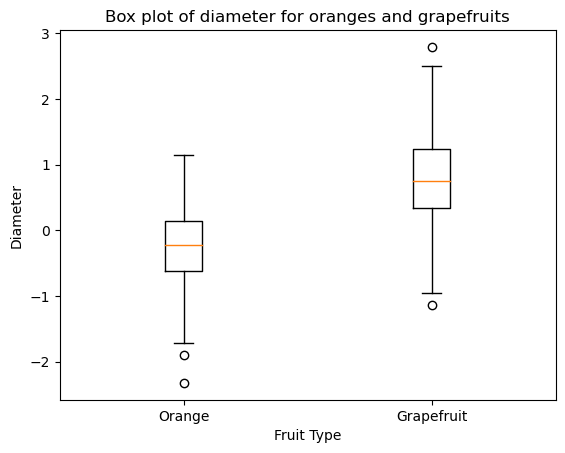

In [36]:
orange_data = resulting_dataset_citrus_CNN[resulting_dataset_citrus_CNN['name'] == 1]
grapefruit_data = resulting_dataset_citrus_CNN[resulting_dataset_citrus_CNN['name'] == 0]

plt.boxplot([orange_data['diameter'], grapefruit_data['diameter']])
plt.xticks([1, 2], ['Orange', 'Grapefruit'])
plt.xlabel('Fruit Type')
plt.ylabel('Diameter')
plt.title('Box plot of diameter for oranges and grapefruits')
plt.show()

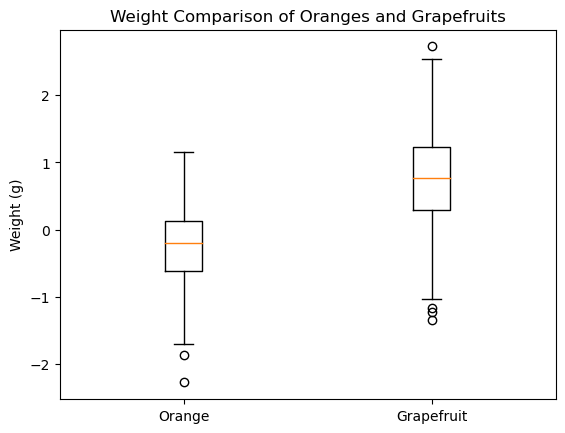

In [37]:
orange_data = resulting_dataset_citrus_CNN[resulting_dataset_citrus_CNN['name'] == 1]
grapefruit_data = resulting_dataset_citrus_CNN[resulting_dataset_citrus_CNN['name'] == 0]

plt.boxplot([orange_data['weight'], grapefruit_data['weight']])
plt.xticks([1, 2], ['Orange', 'Grapefruit'])
plt.ylabel('Weight (g)')
plt.title('Weight Comparison of Oranges and Grapefruits')
plt.show()

### NeighbourhoodCleaningRule 

In [11]:
results_NCR, resulting_dataset_NCR = evaluate_under_sampling_technique(X_csgo, y_csgo, "NCR")
results_csgo = pd.concat([results_NCR,results_csgo], axis=0)
results_NCR.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
NCR,0.823176,0.821342,3314.0,3739.0,83700.0,97928.0,85.470958,0.840756,0.823176,123.184805


In [43]:
results_citrus_NCR, resulting_dataset_citrus_NCR = evaluate_under_sampling_technique(X_citrus, y_citrus, "NCR")
results_citrus = pd.concat([results_citrus_NCR,results_citrus], axis=0)
results_citrus_NCR.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
NCR,0.912,0.911782,0.0,0.0,7208.0,8000.0,90.1,0.915129,0.912,0.785446


In [39]:
results_citrus.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time,algorithm
NCR,0.823176,0.821342,3314.0,3739.0,83700.0,97928.0,85.470958,0.840756,0.823176,165.054822,NaN
0,0.865983,0.865985,3739.0,3739.0,97928.0,97928.0,100.000000,0.865989,NaN,31.907270,Original
1,0.807818,0.805023,3315.0,3739.0,81330.0,97928.0,83.050813,0.830907,NaN,73.429134,ENN
2,0.864513,0.864525,3739.0,3739.0,96532.0,97928.0,98.574463,0.864743,NaN,119.445626,TomekLinks
3,0.823176,0.821342,3314.0,3739.0,83700.0,97928.0,85.470958,0.840756,NaN,123.184805,NCR
4,0.796953,0.796929,3052.0,3739.0,66740.0,97928.0,68.152112,0.797836,NaN,132.613221,SMOTEENN
5,0.655216,0.645726,5.0,3739.0,2185.0,3000.0,72.833333,0.678859,NaN,421.006227,CNN


### Tomek links

In [12]:
results_tomek, resulting_dataset_tomek = evaluate_under_sampling_technique(X_csgo, y_csgo, "TomekLinks")
results_csgo = pd.concat([results_tomek,results_csgo], axis=0)
results_tomek.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
TomekLinks,0.864513,0.864525,3739.0,3739.0,96532.0,97928.0,98.574463,0.864743,0.864513,119.445626


In [44]:
results_tomek_citrus, resulting_dataset_citrus_tomek = evaluate_under_sampling_technique(X_citrus, y_citrus, "TomekLinks")
results_citrus = pd.concat([results_tomek_citrus,results_citrus], axis=0)
results_tomek_citrus.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
TomekLinks,0.916,0.915989,0.0,0.0,7764.0,8000.0,97.05,0.916067,0.916,0.399992


### Edited nearest neighbour - Edition

In [13]:
results_ENN, resulting_dataset_ENN = evaluate_under_sampling_technique(X_csgo, y_csgo, "ENN")
results_csgo = pd.concat([results_ENN,results_csgo], axis=0)
results_ENN.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
ENN,0.807818,0.805023,3315.0,3739.0,81330.0,97928.0,83.050813,0.830907,0.807818,73.429134


In [20]:
resulting_dataset_ENN=pd.DataFrame(resulting_dataset_ENN, columns=X_csgo.columns)
duplicate_count = resulting_dataset_ENN.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 3315


In [45]:
results_ENN_citrus, resulting_dataset_citrus_ENN = evaluate_under_sampling_technique(X_citrus, y_citrus, "ENN")
results_citrus = pd.concat([results_ENN_citrus,results_citrus], axis=0)
results_ENN_citrus.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
ENN,0.914,0.913796,0.0,0.0,7196.0,8000.0,89.95,0.917002,0.914,0.330129


### SMOTEENN - Hybrid

In [14]:
results_smoteenn, resulting_dataset_SMOTEENN = evaluate_under_sampling_technique(X_csgo, y_csgo, "SMOTEENN")
results_csgo = pd.concat([results_csgo,results_smoteenn], axis=0)
results_smoteenn.head(10)

c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
SMOTEENN,0.796953,0.796929,3052.0,3739.0,66740.0,97928.0,68.152112,0.797836,0.796953,132.613221


In [46]:
resulting_dataset_SMOTEENN=pd.DataFrame(resulting_dataset_SMOTEENN, columns=X_csgo.columns)
duplicate_count = resulting_dataset_SMOTEENN.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 3052


In [46]:
results_smoteenn_citrus, resulting_dataset_citrus_SMOTEENN = evaluate_under_sampling_technique(X_citrus, y_citrus, "SMOTEENN")
results_citrus = pd.concat([results_smoteenn_citrus,results_citrus], axis=0)
results_smoteenn_citrus.head(10)

c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
SMOTEENN,0.9275,0.927502,0.0,0.0,6437.0,8000.0,80.4625,0.927515,0.9275,0.562431


In [47]:
results_citrus.head()

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
SMOTEENN,0.9275,0.927502,0.0,0.0,6437.0,8000.0,80.462500,0.927515,0.9275,0.562431
ENN,0.9140,0.913796,0.0,0.0,7196.0,8000.0,89.950000,0.917002,0.9140,0.330129
TomekLinks,0.9160,0.915989,0.0,0.0,7764.0,8000.0,97.050000,0.916067,0.9160,0.399992
NCR,0.9120,0.911782,0.0,0.0,7208.0,8000.0,90.100000,0.915129,0.9120,0.785446
CNN,0.9050,0.904906,0.0,0.0,1763.0,3000.0,58.766667,0.907436,0.9050,41.328188


### Results

Sorting of results for various algorithms - csgo

In [15]:
sorted_results = results_csgo.sort_values(by=["time", "accuracy", "num_instances_end"], ascending=[True, False, True])
sorted_results = sorted_results[["time", "accuracy", "percentage_instances_end", "num_instances_start", "num_instances_end", "precision", "f1-score", "num_duplicated_start", "num_duplicated_end"]]
results_csgo=sorted_results.copy()
# Reset the index to make "algorithm" a column
results_csgo = results_csgo.reset_index()
# Rename the columns to match the original dataframe
results_csgo = results_csgo.rename(columns={'index': 'algorithm', 'Unnamed: 0': ''})
# Display the updated dataframe
results_csgo

,algorithm,time,accuracy,percentage_instances_end,num_instances_start,num_instances_end,precision,f1-score,num_duplicated_start,num_duplicated_end
0,Original,31.907270,0.865983,100.000000,97928.0,97928.0,0.865989,0.865985,3739.0,3739.0
1,ENN,73.429134,0.807818,83.050813,97928.0,81330.0,0.830907,0.805023,3739.0,3315.0
2,TomekLinks,119.445626,0.864513,98.574463,97928.0,96532.0,0.864743,0.864525,3739.0,3739.0
3,NCR,123.184805,0.823176,85.470958,97928.0,83700.0,0.840756,0.821342,3739.0,3314.0
4,SMOTEENN,132.613221,0.796953,68.152112,97928.0,66740.0,0.797836,0.796929,3739.0,3052.0
5,CNN,421.006227,0.655216,72.833333,3000.0,2185.0,0.678859,0.645726,3739.0,5.0


citrus sorting

In [48]:
sorted_results = results_citrus.sort_values(by=["time", "accuracy", "num_instances_end"], ascending=[True, False, True])
sorted_results = sorted_results[["time", "accuracy", "percentage_instances_end", "num_instances_start", "num_instances_end", "precision", "f1-score", "num_duplicated_start", "num_duplicated_end"]]
results_citrus=sorted_results.copy()
# Reset the index to make "algorithm" a column
results_citrus = results_citrus.reset_index()
# Rename the columns to match the original dataframe
results_citrus = results_citrus.rename(columns={'index': 'algorithm', 'Unnamed: 0': ''})
# Display the updated dataframe
results_citrus

,algorithm,time,accuracy,percentage_instances_end,num_instances_start,num_instances_end,precision,f1-score,num_duplicated_start,num_duplicated_end
0,ENN,0.330129,0.9140,89.950000,8000.0,7196.0,0.917002,0.913796,0.0,0.0
1,TomekLinks,0.399992,0.9160,97.050000,8000.0,7764.0,0.916067,0.915989,0.0,0.0
2,Original,0.484540,0.9180,100.000000,8000.0,8000.0,0.918035,0.918003,0.0,0.0
3,SMOTEENN,0.562431,0.9275,80.462500,8000.0,6437.0,0.927515,0.927502,0.0,0.0
4,NCR,0.785446,0.9120,90.100000,8000.0,7208.0,0.915129,0.911782,0.0,0.0
5,CNN,41.328188,0.9050,58.766667,3000.0,1763.0,0.907436,0.904906,0.0,0.0


In [50]:
# Drop the row with the "CondensedNN" algorithm
results_csgo = results_csgo.drop(index=results_csgo[results_csgo['algorithm'] == 'CNN'].index)

# Reset the index to make "algorithm" a column
results_csgo = results_csgo.reset_index(drop=True)

# Display the updated dataframe
results_csgo

,algorithm,time,accuracy,percentage_instances_end,num_instances_start,num_instances_end,precision,f1-score,num_duplicated_start,num_duplicated_end
0,Original,31.907270,0.865983,100.000000,97928.0,97928.0,0.865989,0.865985,3739.0,3739.0
1,ENN,73.429134,0.807818,83.050813,97928.0,81330.0,0.830907,0.805023,3739.0,3315.0
2,TomekLinks,119.445626,0.864513,98.574463,97928.0,96532.0,0.864743,0.864525,3739.0,3739.0
3,NCR,123.184805,0.823176,85.470958,97928.0,83700.0,0.840756,0.821342,3739.0,3314.0
4,SMOTEENN,132.613221,0.796953,68.152112,97928.0,66740.0,0.797836,0.796929,3739.0,3052.0


In [51]:
# Drop the row with the "CondensedNN" algorithm
results_citrus = results_citrus.drop(index=results_citrus[results_citrus['algorithm'] == 'CNN'].index)

# Reset the index to make "algorithm" a column
results_citrus = results_citrus.reset_index(drop=True)

# Display the updated dataframe
results_citrus

,algorithm,time,accuracy,percentage_instances_end,num_instances_start,num_instances_end,precision,f1-score,num_duplicated_start,num_duplicated_end
0,ENN,0.330129,0.9140,89.9500,8000.0,7196.0,0.917002,0.913796,0.0,0.0
1,TomekLinks,0.399992,0.9160,97.0500,8000.0,7764.0,0.916067,0.915989,0.0,0.0
2,Original,0.484540,0.9180,100.0000,8000.0,8000.0,0.918035,0.918003,0.0,0.0
3,SMOTEENN,0.562431,0.9275,80.4625,8000.0,6437.0,0.927515,0.927502,0.0,0.0
4,NCR,0.785446,0.9120,90.1000,8000.0,7208.0,0.915129,0.911782,0.0,0.0


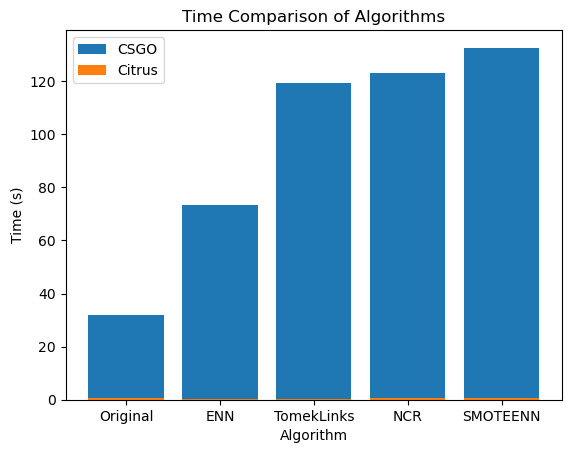

In [52]:
# Create a bar chart of the times for each algorithm for the csgo dataset
plt.bar(results_csgo['algorithm'], results_csgo['time'], label='CSGO')

# Create a bar chart of the times for each algorithm for the citrus dataset
plt.bar(results_citrus['algorithm'], results_citrus['time'], label='Citrus')

# Set the x-axis label and title
plt.xlabel('Algorithm')
plt.ylabel('Time (s)')
plt.title('Time Comparison of Algorithms')

# Add a legend
plt.legend()

# Display the bar chart
plt.show()

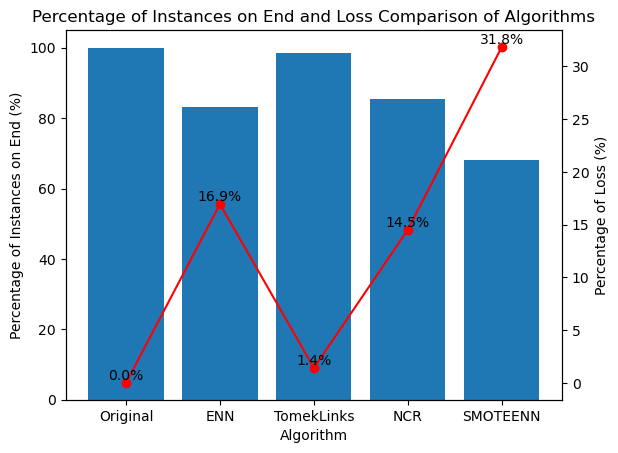

In [53]:
# Create a bar chart of the percentage of instances on end for each algorithm
fig, ax1 = plt.subplots()

ax1.bar(results_csgo['algorithm'], results_csgo['percentage_instances_end'])
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Percentage of Instances on End (%)')
ax1.set_title('Percentage of Instances on End and Loss Comparison of Algorithms')

# Create a second axis on the right side for percentage loss
ax2 = ax1.twinx()

# Calculate the percentage loss
percentage_loss = 100 - results_csgo['percentage_instances_end']

# Plot the percentage loss and write the percentage text next to each point
for i, loss in enumerate(percentage_loss):
    ax2.text(i, loss, f'{loss:.1f}%', ha='center', va='bottom')

ax2.plot(results_csgo['algorithm'], percentage_loss, color='red', marker='o')
ax2.set_ylabel('Percentage of Loss (%)')

# Display the bar chart
plt.show()

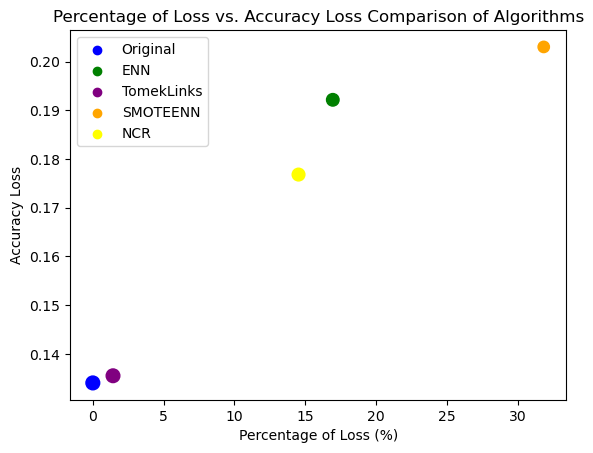

In [54]:
# Calculate the percentage loss and accuracy loss
percentage_loss = 100 - results_csgo['percentage_instances_end']
accuracy_loss = 1 - results_csgo['accuracy']

# Create a color map for the algorithms
colors = {'Original': 'blue', 'ENN': 'green', 
          'TomekLinks': 'purple', 'SMOTEENN': 'orange', "NCR":'yellow'}

# Create a scatter plot of percentage loss vs. accuracy loss
plt.scatter(percentage_loss, accuracy_loss, c=results_csgo['algorithm'].apply(lambda x: colors[x]), 
            s=results_csgo['num_instances_end']/1000)
plt.xlabel('Percentage of Loss (%)')
plt.ylabel('Accuracy Loss')
plt.title('Percentage of Loss vs. Accuracy Loss Comparison of Algorithms')

# Add a legend for the colors
for algorithm in colors:
    plt.scatter([], [], c=colors[algorithm], label=algorithm)
plt.legend()

# Display the scatter plot
plt.show()

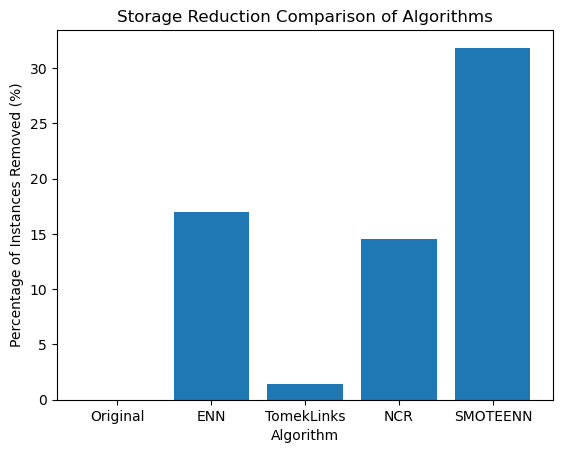

In [55]:
# Calculate the number of instances removed by each algorithm
results_csgo['num_instances_removed'] = results_csgo['num_instances_start'] - results_csgo['num_instances_end']

# Calculate the percentage of instances removed by each algorithm
results_csgo['percentage_reduction'] = (results_csgo['num_instances_removed'] / results_csgo['num_instances_start']) * 100

# Create a bar chart showing the percentage of instances removed by each algorithm
plt.bar(results_csgo['algorithm'], results_csgo['percentage_reduction'])
plt.xlabel('Algorithm')
plt.ylabel('Percentage of Instances Removed (%)')
plt.title('Storage Reduction Comparison of Algorithms')
plt.show()

### ENN + PCA

In [15]:
from imblearn.under_sampling import EditedNearestNeighbours

def evaluate_under_sampling_techniqueX(X, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply ENN to the train set
    enn = EditedNearestNeighbours()
    X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)
    
    # Perform PCA on the resampled data
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train_resampled)
    print("Shape of transformed data after PCA:", X_train_pca.shape)
    
    # Train a k-NN classifier and evaluate the results
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train_resampled)
    y_pred = knn.predict(pca.transform(X_test))
    
    # Compute and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

evaluate_under_sampling_techniqueX(X_csgo, y_csgo)


Shape of transformed data after PCA: (75041, 3)


0.6633853443346132

In [17]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

def evaluate_under_sampling_techniqueX(X, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply NCR to the train set
    ncr = NeighbourhoodCleaningRule()
    X_train_resampled, y_train_resampled = ncr.fit_resample(X_train, y_train)
    
    # Perform PCA on the resampled data
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train_resampled)
    print("Shape of transformed data after PCA:", X_train_pca.shape)
    
    # Train a k-NN classifier and evaluate the results
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train_resampled)
    y_pred = knn.predict(pca.transform(X_test))
    
    # Compute and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

evaluate_under_sampling_techniqueX(X_csgo, y_csgo)


Shape of transformed data after PCA: (80260, 97)


0.7467527162813495

In [19]:

# Get the memory usage in bytes
memory_usage = df_csgo.memory_usage(deep=True).sum()

# Convert to megabytes
memory_usage_mb = memory_usage / (1024 * 1024)

print("Memory usage:", memory_usage_mb, "MB")

Memory usage: 90.23958015441895 MB


Finding 60 most important features

In [21]:
# Define the number of top features to select
k = 60

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_csgo.drop('round_winner', axis=1), df_csgo['round_winner'], test_size=0.2, random_state=42)

# Feature selection using ANOVA F-value
selector = SelectKBest(f_classif, k=k)
X_train = selector.fit_transform(X_train, y_train)

# Train a k-NN classifier and evaluate the results
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
X_test = selector.transform(X_test)
y_pred = knn.predict(X_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the selected top k features
top_k_indices = selector.get_support(indices=True)
top_k_features = df_csgo.drop('round_winner', axis=1).columns[top_k_indices]
print("Top", k, "features:", top_k_features)


c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Accuracy: 0.7826566456988808
Top 60 features: Index(['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_galilar', 't_weapon_galilar', 't_weapon_glock',
       'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4',
       't_weapon_mac10', 't_weapon_mp5sd', 'ct_weapon_mp9', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ump45',
       't_weapon_deagle', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 't_weapon_p2000',
       'ct_weapon_tec9', 'ct_grenade_hegrenade', 't_grenade_hegrenade',
       'ct_grenade_flashbang', 't_grenade_flashbang',
       'ct_grenade_

In [22]:
selected_features_df = df_csgo[top_k_features.tolist() + ['round_winner']]
selected_features_df.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_famas,t_weapon_famas,ct_weapon_galilar,t_weapon_galilar,t_weapon_glock,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,t_weapon_mac10,t_weapon_mp5sd,ct_weapon_mp9,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ump45,t_weapon_deagle,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,t_weapon_p2000,ct_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,t_grenade_decoygrenade,map_de_dust2,map_de_inferno,map_de_nuke,map_de_train,round_winner
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [23]:
# Get the memory usage in bytes
memory_usage = selected_features_df.memory_usage(deep=True).sum()

# Convert to megabytes
memory_usage_mb = memory_usage / (1024 * 1024)

print("Memory usage:", memory_usage_mb, "MB")

Memory usage: 55.68475532531738 MB


In [61]:
X = selected_features_df.drop(['round_winner'], axis=1)
y = selected_features_df['round_winner']
results_ENN, resulting_dataset_ENN = evaluate_under_sampling_technique(X, y, "ENN")
results_csgo = pd.concat([results_ENN,results_csgo], axis=0)
results_ENN.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
ENN,0.797443,0.793968,3305.0,3809.0,79971.0,97928.0,81.663059,0.823665,0.797443,68.423802


In [62]:
X = selected_features_df.drop(['round_winner'], axis=1)
y = selected_features_df['round_winner']
results_ENN, resulting_dataset_ENN = evaluate_under_sampling_technique(X, y, "NCR")
results_csgo = pd.concat([results_ENN,results_csgo], axis=0)
results_ENN.head(10)

,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
NCR,0.813659,0.81143,3298.0,3809.0,82983.0,97928.0,84.738788,0.833201,0.813659,111.26283


In [63]:
X = selected_features_df.drop(['round_winner'], axis=1)
y = selected_features_df['round_winner']
results_smoteENN, resulting_dataset_ENN = evaluate_under_sampling_technique(X, y, "SMOTEENN")
results_csgo = pd.concat([results_smoteENN,results_csgo], axis=0)
results_smoteENN.head(10)

c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,accuracy,f1-score,num_duplicated_end,num_duplicated_start,num_instances_end,num_instances_start,percentage_instances_end,precision,recall,time
SMOTEENN,0.793767,0.793726,2991.0,3809.0,64216.0,97928.0,65.574708,0.794823,0.793767,138.502293


In [67]:
# Drop duplicate rows in selected_features_df
selected_features_df.drop_duplicates(inplace=True)

# Count the number of duplicate rows that were dropped
num_duplicates = selected_features_df.duplicated().sum()
finalDF=selected_features_df.copy()
# Print the number of duplicate rows
print(f"Dropped {num_duplicates} duplicate rows.")


C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_15968\1268991297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df.drop_duplicates(inplace=True)


Dropped 0 duplicate rows.


In [79]:
# Get the memory usage in bytes
memory_usage = finalDF.memory_usage(deep=True).sum()

# Convert to megabytes
memory_usage_mb = memory_usage / (1024 * 1024)

print("Memory usage:", memory_usage_mb, "MB")

Memory usage: 54.28507328033447 MB


In [83]:
# Check the class balance of the target variable
print(finalDF['round_winner'].value_counts())

1    59894
0    57471
Name: round_winner, dtype: int64


In [75]:
# Define the features and target variable
features = finalDF.drop('round_winner', axis=1)
target = finalDF['round_winner']
X_scaled = StandardScaler().fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Balance the classes using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [80]:
print("Showing the final shape of the dataset")
X_resampled.shape

Showing the final shape of the dataset


(60551, 60)

In [78]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     11537
           1       0.81      0.76      0.79     11936

    accuracy                           0.79     23473
   macro avg       0.79      0.79      0.79     23473
weighted avg       0.79      0.79      0.79     23473



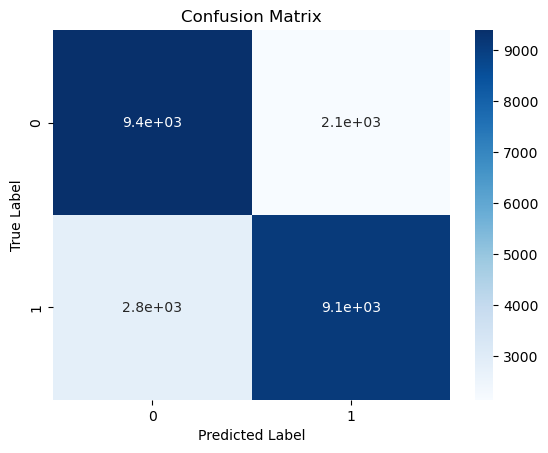

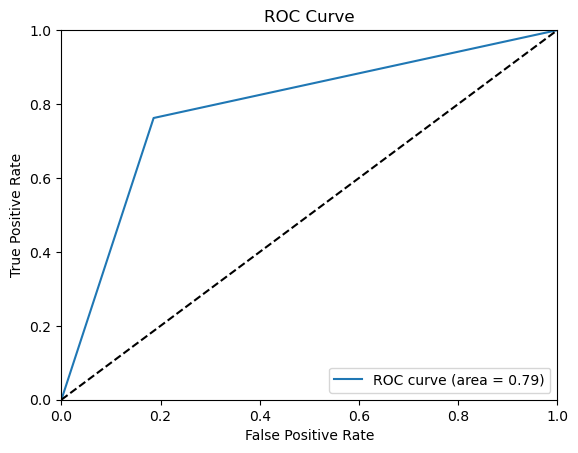

In [82]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve and calculate the AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# TESTING ALGORITHMS ON DEFAULT DATASETS AND WRITING PSEUDOCODES

In [ ]:
S=TR
For all Xi  do
    Compute k-reachability (Xi) and k-coverage (Xi)
For all Xi S do
    If Xi is a noisy instance
        Remove Xi from S
        For all Xj € k-coverage (Xi)
            Remove Xi from k-reachability (Xj)
            Update k-reachability(Xj)
        For all Xj e k-reachability(Xi)
            Remove Xi from k-coverage (Xj)
Sort the order of instances in S according to rule 2
For all Xi € S
    If Xi satisfies rule 1
        Remove Xi from §
        For all Xj € k-coverage (Xi)
            Remove Xi from k-reachability(Xj)
            Update k-reachability (Xj)
Return S

In [ ]:
DROP1 (Training set TR): Selection set S.
    Let S=TR.
    For each instance Xi in S:
        Find the k + 1 nearest neighbors of Xi in §.
        Add Xi to each of its lists of associates.
    For each instance Xi in S:
        Let with =# of associates of Xi classified
        correctly with Xi as a neighbor.
        Let without =# of associates of Xi classified
        correctly without Xi.
        If without >= with
            Remove Xi from S.
            For each associate a of Xi
                Remove Xi from a’s list of neighbors.
                Find a new nearest neighbor for a.
                Add a to its new list of associates.
            For each neighbor b of Xi
                Remove Xi from b's lists of associates.
        Endif
    Return S.

In [ ]:
class CondensedKNearestNeighbors(kNearestNeighbors):
    """
    This takes a set of training data and adds relevant samples one by one until no more are added. 
    It then creates a kNearestNeighbors object using just those samples.
    """

    def __init__(self, train, k=1):
        """
        @param train The full training set to be cut down
        @param k=1 A k value, with the default set to 1
        """

        samples = []  # sample Observations
        randomSample = train.pop(random.randint(0, len(train) - 1))
        samples.append(randomSample)  # Choose a random starting Observation

        numberOfSamples = len(samples)
        while True:  # continue until no more samples are added
            minSampleDistance = 99999  # set initial distance high to always improve at the beginning
            closestSample = None  # there is no closest potential sample at the start
            for index, observation in enumerate(train):
                for sample in samples:
                    sampleDistance = observation.calcDistance(sample)
                    if sampleDistance < minSampleDistance:
                        minSampleDistance = sampleDistance
             Loading           closestSample = sample
                if closestSample.classifier == observation.classifier:  # do not consider for reduction, these are the same class and the closest sample will represent it
                    continue
                else:  # current observation is a different class from its closest sample, add this to the reduced dataset
                    samples.append(train.pop(index))
            if len(samples) == numberOfSamples:  # no new samples on this pass, exit the while loop
                break
            numberOfSamples = len(samples)  # update the number of samples to check against the next run
        print("Number of samples selected: " + str(len(samples)))

        super().__init__(samples, k)  # initialize a kNearestNeigbors object with these samples as training set


In [168]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def D(x, Zc):
    return euclidean_distance(x, Zc)

def class_of(x):
    return x[-1]

def CNN(S, y, Z):
    Z = set()

    while True:
        additions = False
        
        for i in range(len(S)):
            x = S[i]
            y_x = y[i]
            
            # Pronalazimo Zc u skupu Z tako da je D(x, Zc) minimalno
            Zc = None
            min_distance = float('inf')
            for Zj in Z:
                distance = D(x, S[Zj])
                if distance < min_distance:
                    min_distance = distance
                    Zc = Zj
            
            # Ako je Z prazan, dodajemo trenutni uzorak x u Z
            if not Z:
                Z.add(i)
                additions = True
            # Proveravamo da li se klase razlikuju
            elif y_x != y[Zc]:
                Z.add(i)
                additions = True
        
        if not additions:
            break

    return Z

def under_sampling_evaluationReal(X, y):
    X_scaled = StandardScaler().fit_transform(X)
    X_normalized = Normalizer().fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train_df = pd.DataFrame(X_train, columns=X.columns)

    # Resetujemo indekse za y_train
    y_train = y_train.reset_index(drop=True)

    # Koristimo CNN algoritam za preprocesiranje trening skupa
    Z = CNN(X_train_df, y_train, set())
    X_train_resampled = X_train_df.iloc[list(Z)]
    y_train_resampled = y_train.iloc[list(Z)]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    result = {
        "time": time.time(),
        "accuracy": accuracy,
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"],
        "num_instances_start": X_train.shape[0],
        "num_instances_end": X_train_resampled.shape[0],
        "percentage_instances_end": (X_train_resampled.shape[0] / X_train.shape[0]) * 100,
        "num_duplicated_start": X_train_df.duplicated().sum(),
        "num_duplicated_end": X_train_resampled.duplicated().sum(),
    }

    return result

In [ ]:
X = df_citrus.drop('name', axis=1)  # Feature columns
y = df_citrus['name']  # Target column
under_sampling_evaluationReal(X, y)

### Pseudo code for condensed nearest neighbours

In [95]:
def condensed_k_nearest_neighbors(train):
    samples = set()

    # Choose a random starting observation
    random_sample = train.pop(random.randint(0, len(train) - 1))
    samples.add(random_sample)

    additions = True
    while additions:
        additions = False
        for _ in range(len(train)):
            x = random.choice(train)

            min_distance = float('inf')
            closest_sample = None
            for sample in samples:
                distance = x.calcDistance(sample)
                if distance < min_distance:
                    min_distance = distance
                    closest_sample = sample

            if x.classifier != closest_sample.classifier:
                samples.add(x)
                train.remove(x)
                additions = True

    print("Number of samples selected: " + str(len(samples)))
    return samples

In [ ]:
# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)



# Use the condensed_k_nearest_neighbors function to select a subset of the training set
selected_samples = condensed_k_nearest_neighbors(X_train)

# Train a k-nearest neighbors classifier on the full training set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Train a k-nearest neighbors classifier on the selected subset of the training set
knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit([x for x in selected_samples], [y_train[list(X_train).index(x)] for x in selected_samples])

# Evaluate the classifiers on the testing set
print("Accuracy on full training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on full testing set: {:.3f}".format(knn.score(X_test, y_test)))
print("Accuracy on selected training set: {:.3f}".format(knn_selected.score(X_train, y_train)))
print("Accuracy on selected testing set: {:.3f}".format(knn_selected.score(X_test, y_test)))


### CNN statiscits - more than statistics

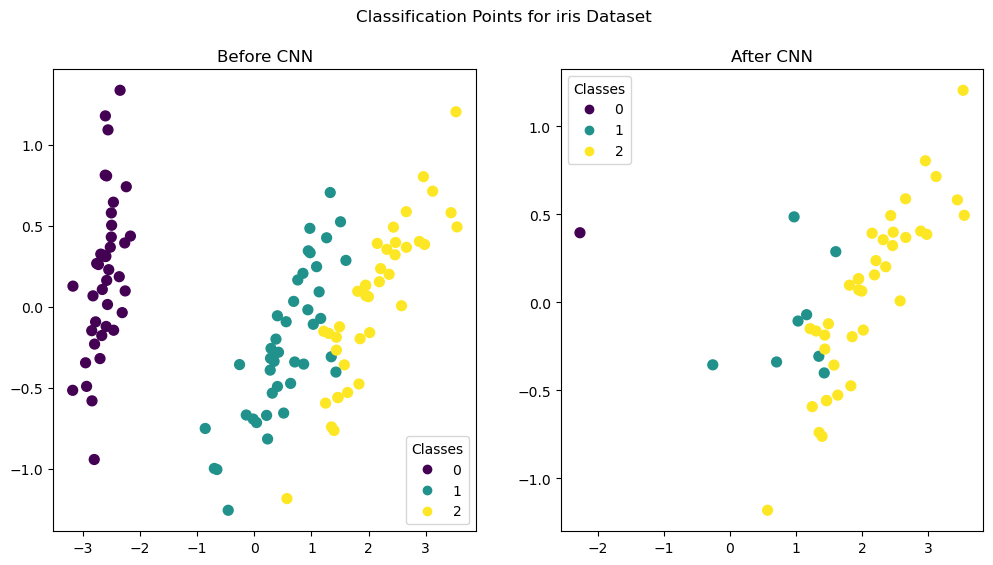

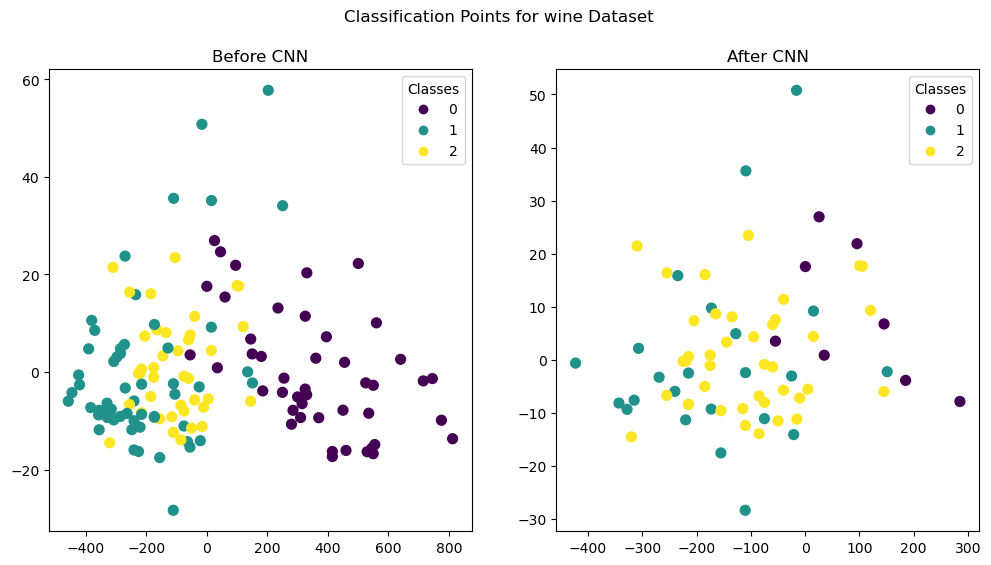

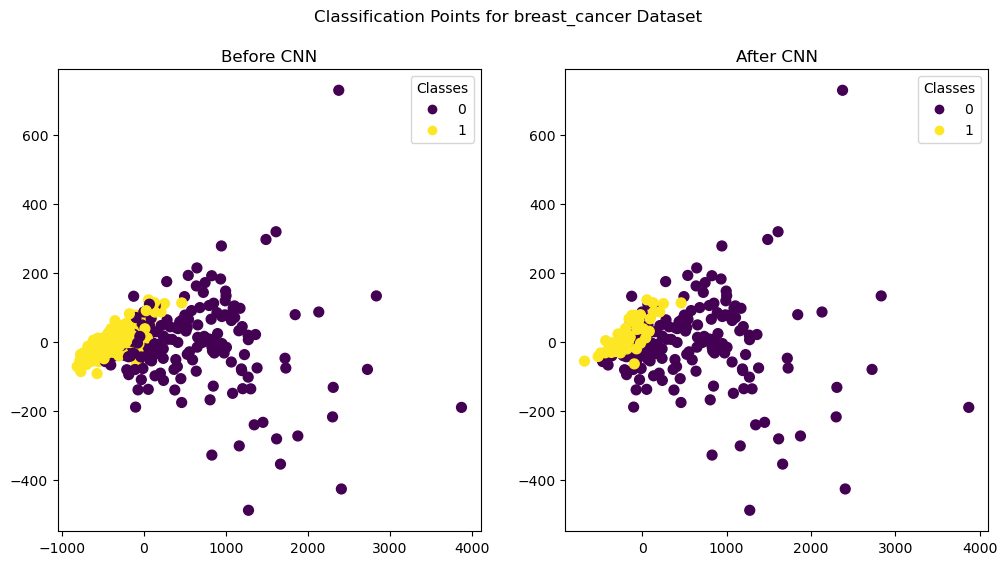

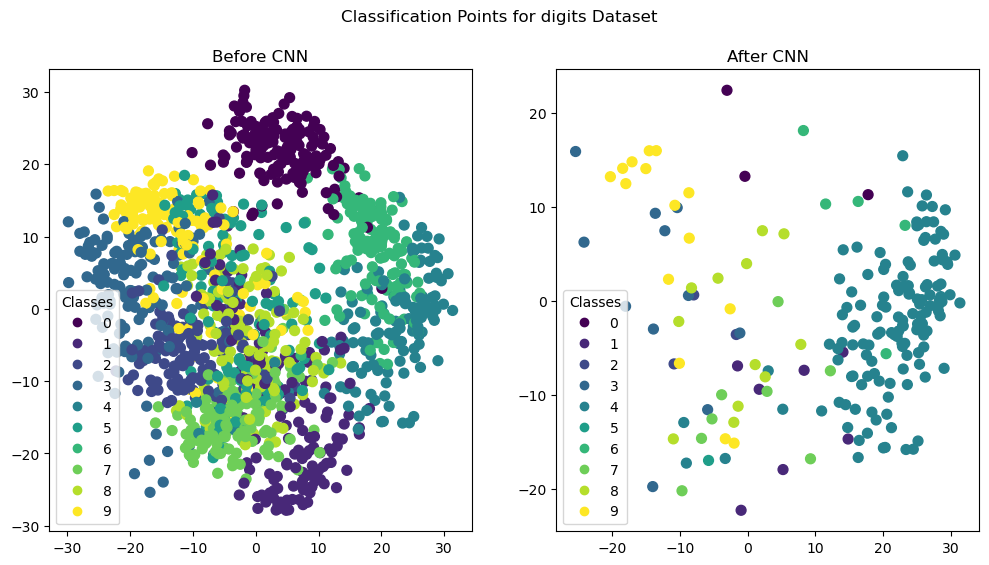

KeyboardInterrupt: 

In [204]:
# Loading well-known datasets
dataset_names = ["Iris", "Wine", "Breast Cancer", "Digits", "Diabetes"]
dataset_loaders = [
    datasets.load_iris,
    datasets.load_wine,
    datasets.load_breast_cancer,
    datasets.load_digits,
    datasets.load_diabetes,
]

execution_times = []
accuracies = []
reduction_ratios = []
before_accuracies = []

for loader in dataset_loaders:
    dataset = loader()

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=42
    )

    cnn = CondensedNearestNeighbour(random_state=42)
    knn = KNeighborsClassifier()

    # Accuracy before
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    before_accuracy = accuracy_score(y_test, y_pred)
    before_accuracies.append(before_accuracy)

    start_time = time.time()
    X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    reduction_ratio = 1 - (len(X_resampled) / len(X_train))
    reduction_ratios.append(reduction_ratio)

    # Scatter plot of classification points before and after applying CNN
    if dataset.data.shape[1] > 2:
        pca = PCA(n_components=2)
        X_train_transformed = pca.fit_transform(X_train)
        X_resampled_transformed = pca.transform(X_resampled)
    else:
        X_train_transformed = X_train
        X_resampled_transformed = X_resampled

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Classification Points for {loader.__name__[5:]} Dataset')

    scatter = ax1.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap='viridis', marker='o', s=50)
    ax1.set_title('Before CNN')
    ax1.legend(*scatter.legend_elements(), title='Classes')

    scatter = ax2.scatter(X_resampled_transformed[:, 0], X_resampled_transformed[:, 1], c=y_resampled, cmap='viridis', marker='o', s=50)
    ax2.set_title('After CNN')
    ax2.legend(*scatter.legend_elements(), title='Classes')

    plt.show()

# Pravljenje grafa za reduction ratio
fig, ax = plt.subplots()
bars = ax.barh(dataset_names, reduction_ratios, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Reduction Ratio')
ax.set_ylabel('Dataset')
ax.set_title('Reduction Ratio for Different Datasets')

for i, (loader, reduction_ratio) in enumerate(zip(dataset_loaders, reduction_ratios)):
    dataset = loader()
    X_train, _, _, _ = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)
    initial_size = len(X_train)
    final_size = int(initial_size * (1 - reduction_ratio))

    label = f"Initial: {initial_size},\n Final: {final_size},\n RR: {reduction_ratio:.2f}"
    width = bars[i].get_width()
    ax.text(width, i, label, ha='left', va='center')

plt.show()

# Pravljenje grafa za accuracy
fig, ax = plt.subplots()
ax.bar(range(len(dataset_names)), before_accuracies, color='gray', label='Accuracy before')
ax.bar(range(len(dataset_names)), accuracies, color=['b', 'g', 'r', 'c', 'm'], label='Accuracy after')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Datasets')
ax.set_xticks(range(len(dataset_names)))
ax.set_xticklabels(dataset_names)
ax.legend()
plt.show()

# Pravljenje grafa za execution time
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, execution_times, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time for Different Datasets')

for i, (loader, execution_time) in enumerate(zip(dataset_loaders, execution_times)):
    label = f"Execution Time: {execution_time:.2f} s"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()


### CNN statistics

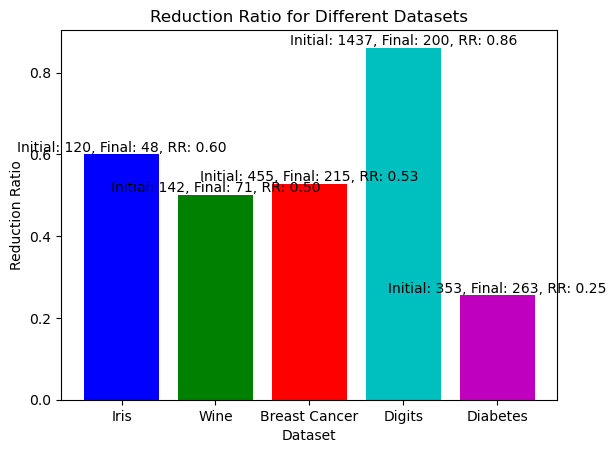

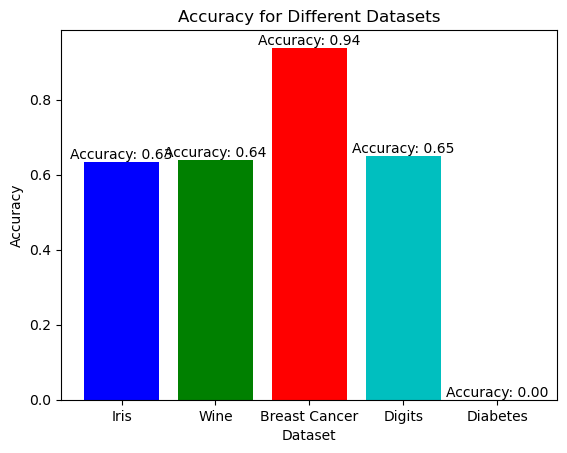

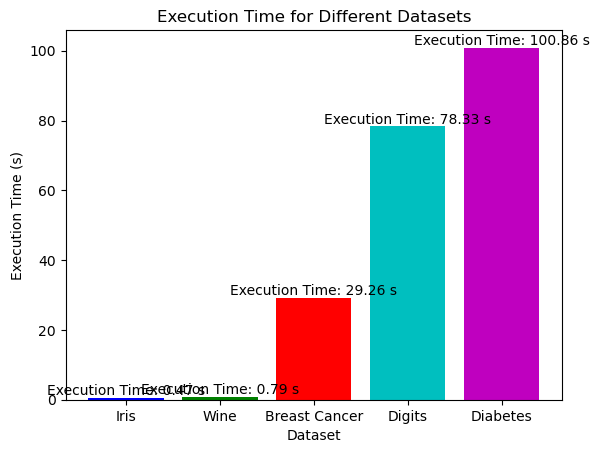

In [180]:
# Pravljenje grafa za reduction ratio
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, reduction_ratios, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Reduction Ratio')
ax.set_title('Reduction Ratio for Different Datasets')

for i, (loader, reduction_ratio) in enumerate(zip(dataset_loaders, reduction_ratios)):
    dataset = loader()
    X_train, _, _, _ = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)
    initial_size = len(X_train)
    final_size = int(initial_size * (1 - reduction_ratio))
    
    label = f"Initial: {initial_size}, Final: {final_size}, RR: {reduction_ratio:.2f}"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()

# Pravljenje grafa za accuracy
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, accuracies, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Datasets')

for i, (loader, accuracy) in enumerate(zip(dataset_loaders, accuracies)):
    label = f"Accuracy: {accuracy:.2f}"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()

# Pravljenje grafa za execution time
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, execution_times, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time for Different Datasets')

for i, (loader, execution_time) in enumerate(zip(dataset_loaders, execution_times)):
    label = f"Execution Time: {execution_time:.2f} s"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()


### ENN

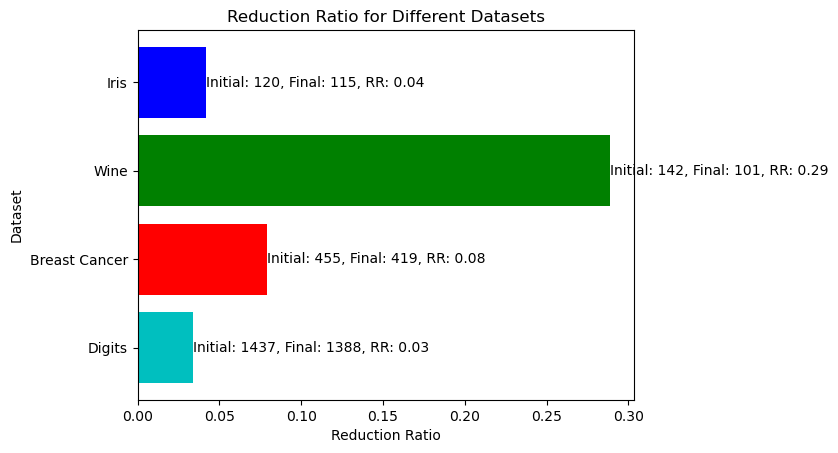

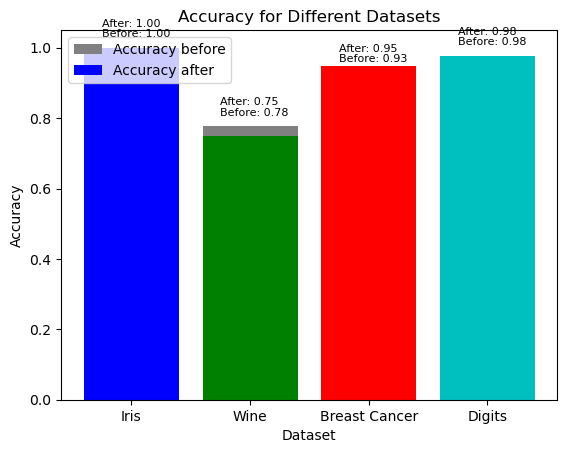

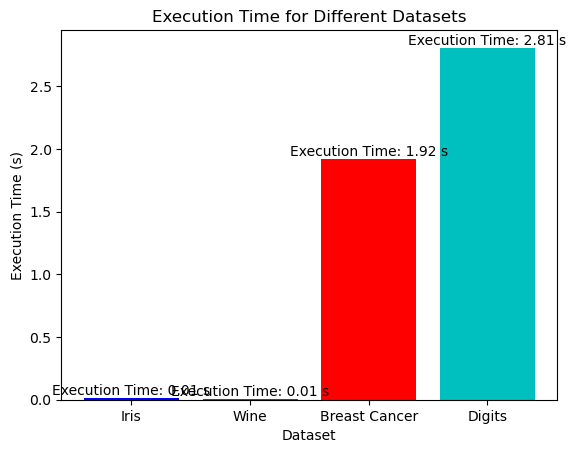

In [205]:
# Loading well-known datasets
dataset_names = ["Iris", "Wine", "Breast Cancer", "Digits"]
dataset_loaders = [    datasets.load_iris,    datasets.load_wine,    datasets.load_breast_cancer,    datasets.load_digits]

execution_times = []
accuracies = []
reduction_ratios = []
before_accuracies = []

for loader in dataset_loaders:
    dataset = loader()

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=42
    )

    enn = EditedNearestNeighbours()
    knn = KNeighborsClassifier(n_neighbors=1)

    # Accuracy before
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    before_accuracy = accuracy_score(y_test, y_pred)
    before_accuracies.append(before_accuracy)

    start_time = time.time()
    X_resampled, y_resampled = enn.fit_resample(X_train, y_train)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    reduction_ratio = 1 - (len(X_resampled) / len(X_train))
    reduction_ratios.append(reduction_ratio)

# Pravljenje grafa za reduction ratio
fig, ax = plt.subplots()
bars = ax.barh(dataset_names, reduction_ratios, color=['b', 'g', 'r', 'c'])
ax.set_xlabel('Reduction Ratio')
ax.set_ylabel('Dataset')
ax.set_title('Reduction Ratio for Different Datasets')
ax.invert_yaxis()  # dodata linija za rotiranje grafika

for i, (loader, reduction_ratio) in enumerate(zip(dataset_loaders, reduction_ratios)):
    dataset = loader()
    X_train, _, _, _ = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)
    initial_size = len(X_train)
    final_size = int(initial_size * (1 - reduction_ratio))
    
    label = f"Initial: {initial_size}, Final: {final_size}, RR: {reduction_ratio:.2f}"
    width = bars[i].get_width()
    ax.text(width, i, label, ha='left', va='center')

plt.show()

fig, ax = plt.subplots()
ax.bar(range(len(dataset_names)), before_accuracies, color='gray', label='Accuracy before')
ax.bar(range(len(dataset_names)), accuracies, color=['b', 'g', 'r', 'c'], label='Accuracy after')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Datasets')
ax.set_xticks(range(len(dataset_names)))
ax.set_xticklabels(dataset_names)

# Dodatak za ispis tacnih vrednosti
step = 0.03
for i, (dataset_name, before_acc, acc) in enumerate(zip(dataset_names, before_accuracies, accuracies)):
    plt.text(i-0.25, before_acc+step, f'Before: {before_acc:.2f}', fontsize=8, color='black')
    plt.text(i-0.25, before_acc+2*step, f'After: {acc:.2f}', fontsize=8, color='black')

ax.legend()
plt.show()

# Pravljenje grafa za execution time
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, execution_times, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time for Different Datasets')

for i, (loader, execution_time) in enumerate(zip(dataset_loaders, execution_times)):
    label = f"Execution Time: {execution_time:.2f} s"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()




### SMOTE+ENN

In [ ]:
# Učitavanje poznatih skupova podataka
dataset_names = ["Iris", "Wine", "Breast Cancer", "Digits"]
dataset_loaders = [datasets.load_iris, datasets.load_wine, datasets.load_breast_cancer, datasets.load_digits]

execution_times = []
accuracies = []
reduction_ratios = []
before_accuracies = []

for loader in dataset_loaders:
    dataset = loader()

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=42
    )

    svbps = SVBPS()
    knn = KNeighborsClassifier(n_neighbors=1)

    # Tačnost pre
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    before_accuracy = accuracy_score(y_test, y_pred)
    before_accuracies.append(before_accuracy)

    start_time = time.time()
    X_resampled, y_resampled = svbps.fit_resample(X_train, y_train)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    reduction_ratio = 1 - (len(X_resampled) / len(X_train))
    reduction_ratios.append(reduction_ratio)

# Pravljenje grafa za reduction ratio
fig, ax = plt.subplots()
bars = ax.barh(dataset_names, reduction_ratios, color=['b', 'g', 'r', 'c'])
ax.set_xlabel('Reduction Ratio')
ax.set_ylabel('Dataset')
ax.set_title('Reduction Ratio for Different Datasets')
ax.invert_yaxis()  # dodata linija za rotiranje grafika

for i, (loader, reduction_ratio) in enumerate(zip(dataset_loaders, reduction_ratios)):
    dataset = loader()
    X_train, _, _, _ = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)
    initial_size = len(X_train)
    final_size = int(initial_size * (1 - reduction_ratio))
    
    label = f"Initial: {initial_size}, Final: {final_size}, RR: {reduction_ratio:.2f}"
    width = bars[i].get_width()
    ax.text(width, i, label, ha='left', va='center')

plt.show()

fig, ax = plt.subplots()
ax.bar(range(len(dataset_names)), before_accuracies, color='gray', label='Accuracy before')
ax.bar(range(len(dataset_names)), accuracies, color=['b', 'g', 'r', 'c'], label='Accuracy after')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Datasets')
ax.set_xticks(range(len(dataset_names)))
ax.set_xticklabels(dataset_names)

# Dodatak za ispis tacnih vrednosti
step = 0.03
for i, (dataset_name, before_acc, acc) in enumerate(zip(dataset_names, before_accuracies, accuracies)):
    plt.text(i-0.25, before_acc+step, f'Before: {before_acc:.2f}', fontsize=8, color='black')
    plt.text(i-0.25, before_acc+2*step, f'After: {acc:.2f}', fontsize=8, color='black')

ax.legend()
plt.show()

# Pravljenje grafa za execution time
fig, ax = plt.subplots()
bars = ax.bar(dataset_names, execution_times, color=['b', 'g', 'r', 'c', 'm'])
ax.set_xlabel('Dataset')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time for Different Datasets')

for i, (loader, execution_time) in enumerate(zip(dataset_loaders, execution_times)):
    label = f"Execution Time: {execution_time:.2f} s"
    height = bars[i].get_height()
    ax.text(i, height, label, ha='center', va='bottom')

plt.show()




### DROP2

In [ ]:
"""DROP2(Training set T_R): Selection set S.
Let S = T_R.
For each instance Xi in S:
    Find the k + 1 nearest neighbors of Xi in S.
    Add Xi to each of its lists of associates.

# Sort instances in S by distance to their nearest enemy
S = sorted(S, key=lambda x: x.distance_to_nearest_enemy, reverse=True)

For each instance Xi in S:
    Let with = # of associates of Xi classified
    correctly with Xi as a neighbor.
    Let without = # of associates of Xi classified
    correctly without Xi.
    If without ≥ with:
        Remove Xi from S.
    Else:
        For each associate a of Xi:
            If a not in S:
                Remove Xi from a’s list of neighbors.
                Find a new nearest neighbor for a.
                Add a to its new list of associates.
        For each neighbor b of Xi:
            If b not in S:
                Remove Xi from b’s lists of associates.
Return S.
"""

### DROP3

In [209]:
def k_reachability(X, k):
    # Compute k-reachability for each instance in X
    nn = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nn.kneighbors(X)
    reach_dist = distances[:, -1]
    reachability = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        reachability[i] = np.max(reach_dist[indices[i]])
    return reachability

def k_coverage(X, y, k):
    # Compute k-coverage for each instance in X
    nn = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nn.kneighbors(X)
    coverage = []
    for i in range(X.shape[0]):
        neighbors = indices[i, 1:]
        neighbor_labels = y[neighbors]
        same_class = neighbor_labels == y[i]
        if np.any(same_class):
            coverage.append(neighbors[same_class])
        else:
            coverage.append([])
    return coverage

def is_superfluous(X, y, i, k):
    # Check if instance i is superfluous
    k_reach = k_reachability(X, k)
    k_cov = k_coverage(X, y, k)
    neighbors = k_cov[i]
    for j in neighbors:
        if j != i and j not in k_reachability(X[j], k):
            return True
    return False

def is_noisy(X, y, i, k):
    # Check if instance i is noisy
    k_reach = k_reachability(X, k)
    k_cov = k_coverage(X, y, k)
    if i in k_cov[i]:
        return False
    if k_reach[i] <= np.min(k_reach[neighbors]):
        return True
    return False

def c_pruner(X, y, k):
    # Apply C-Pruner algorithm to remove noisy and superfluous instances
    n_samples = X.shape[0]
    S = np.arange(n_samples)
    k_reach = np.zeros(n_samples)
    k_cov = [[] for i in range(n_samples)]
    for i in range(n_samples):
        k_reach[i] = np.max(k_reachability(X[i, :], k))
        k_cov[i] = k_coverage(X, y, k)[i]
    # Remove noisy instances
    for i in range(n_samples):
        if is_noisy(X, y, i, k):
            S = np.delete(S, i)
            for j in k_cov[i]:
                k_reach[j] = np.max(k_reachability(X[j, :], k))
                k_cov[j] = k_coverage(X, y, k)[j]
                k_reach[j] = np.max(k_reachability(X[j, :], k))
    # Remove superfluous instances
    order = np.lexsort((k_reach, -np.array([len(x) for x in k_cov])))
    for i in order:
        if is_superfluous(X, y, i, k):
            S = np.delete(S, i)
            for j in k_cov[i]:
                k_reach[j] = np.max(k_reachability(X[j, :], k))
                k_cov[j] = k_coverage(X, y, k)[j]
    return X[S, :], y[S]


In [ ]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Reshape X to a 2D array with one column
X = X.reshape(-1, 1)

# Apply C-Pruner to select a subset of instances
k = 5
X_pruned, y_pruned = c_pruner(X, y, k)

# Print number of instances before and after pruning
print(f"Number of instances before pruning: {X.shape[0]}")
print(f"Number of instances after pruning: {X_pruned.shape[0]}")

# Perform classification using pruned dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split pruned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y_pruned, test_size=0.3, random_state=42)

# Train logistic regression classifier on training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Evaluate classifier on testing set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on testing set: {acc:.2f}")


In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Undersample and plot imbalanced dataset with Tomek Links

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


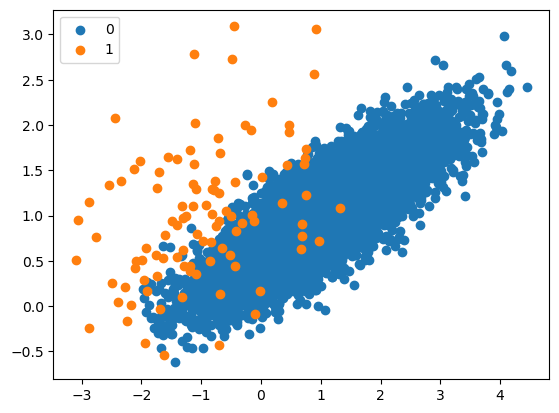

In [185]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### TOMEK + CNN

Class distribution after Tomek Links: Counter({0: 1582, 1: 18})
Class distribution after Tomek Links and CNN: Counter({1: 18, 0: 4})
Accuracy scores:
Original data: 0.9975
Tomek Links data: 0.9975
Tomek Links and CNN data: 0.0825


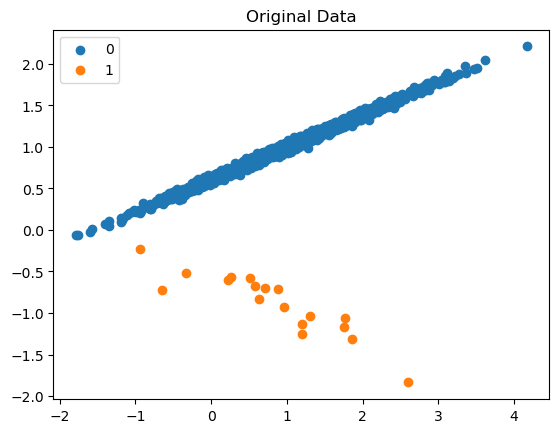

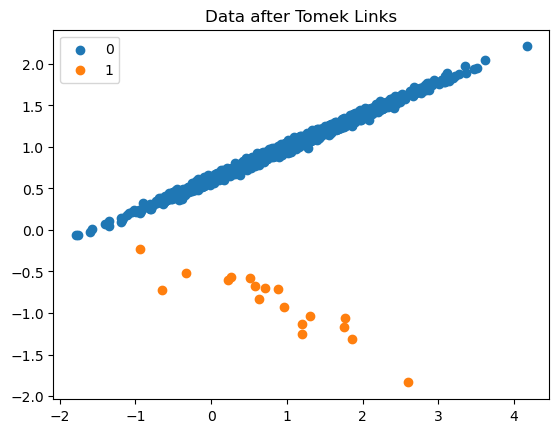

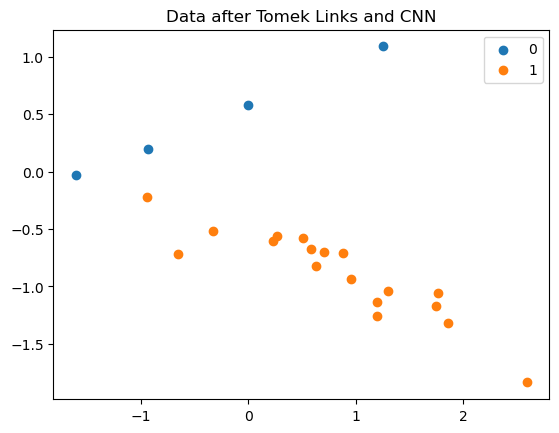

In [192]:
# Define dataset
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN classifier
knn = KNeighborsClassifier()

# Apply KNN on the original data
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Define the undersampling methods
tomek = TomekLinks()
cnn = CondensedNearestNeighbour(n_neighbors=1)

# Apply Tomek Links
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)
counter_tomek = Counter(y_tomek)
print("Class distribution after Tomek Links:", counter_tomek)

# Apply KNN on the Tomek Links data
knn.fit(X_tomek, y_tomek)
y_pred_tomek = knn.predict(X_test)
accuracy_tomek = accuracy_score(y_test, y_pred_tomek)

# Apply CNN on the result of Tomek Links
X_cnn_tomek, y_cnn_tomek = cnn.fit_resample(X_tomek, y_tomek)
counter_cnn_tomek = Counter(y_cnn_tomek)
print("Class distribution after Tomek Links and CNN:", counter_cnn_tomek)

# Apply KNN on the Tomek Links and CNN data
knn.fit(X_cnn_tomek, y_cnn_tomek)
y_pred_cnn_tomek = knn.predict(X_test)
accuracy_cnn_tomek = accuracy_score(y_test, y_pred_cnn_tomek)

print(f"Accuracy scores:")
print(f"Original data: {accuracy_original}")
print(f"Tomek Links data: {accuracy_tomek}")
print(f"Tomek Links and CNN data: {accuracy_cnn_tomek}")

# Scatter plots
plot_scatter(X_train, y_train, 'Original Data')
plot_scatter(X_tomek, y_tomek, 'Data after Tomek Links')
plot_scatter(X_cnn_tomek, y_cnn_tomek, 'Data after Tomek Links and CNN')


kao sto mozemo da vidimo, CNN ne izbacuje duplikate iz trening podataka. 

### Istrazivanje seta podataka

In [16]:
# Separate the features and target column
X = df.drop('round_winner', axis=1)  # Feature columns
y = df['round_winner']  # Target column

# Keep only numerical columns in the features
X = X.select_dtypes(include='number')

# Split the dataset into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a kNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[9366 2638]
 [2706 9772]]

Classification Report:
              precision    recall  f1-score   support

          CT       0.78      0.78      0.78     12004
           T       0.79      0.78      0.79     12478

    accuracy                           0.78     24482
   macro avg       0.78      0.78      0.78     24482
weighted avg       0.78      0.78      0.78     24482

Accuracy: 0.7817171799689567


In [18]:
# Convert the 'round_winner' column to binary values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype('int32').flatten()

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Epoch 1/10
2143/2143 [==============================] - 111s 46ms/step - loss: 0.4773 - accuracy: 0.7427 - val_loss: 0.4598 - val_accuracy: 0.7534
Epoch 2/10
2143/2143 [==============================] - 68s 32ms/step - loss: 0.4506 - accuracy: 0.7573 - val_loss: 0.4487 - val_accuracy: 0.7583
Epoch 3/10
2143/2143 [==============================] - 126s 59ms/step - loss: 0.4418 - accuracy: 0.7654 - val_loss: 0.4445 - val_accuracy: 0.7612
Epoch 4/10
2143/2143 [==============================] - 73s 34ms/step - loss: 0.4346 - accuracy: 0.7714 - val_loss: 0.4420 - val_accuracy: 0.7675
Epoch 5/10
2143/2143 [==============================] - 74s 35ms/step - loss: 0.4278 - accuracy: 0.7786 - val_loss: 0.4422 - val_accuracy: 0.7664
Epoch 6/10
2143/2143 [==============================] - 143s 67ms/step - loss: 0.4218 - accuracy: 0.7816 - val_loss: 0.4389 - val_accuracy: 0.7726
Epoch 7/10
2143/2143 [==============================] - 208s 97ms/step - loss: 0.4164 - accuracy: 0.7853 - val_loss: 0.44

In [31]:
# categorical values
# Find all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['map', 'round_winner']


In [33]:
# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'map' column, then convert it to a DataFrame
map_encoded = one_hot_encoder.fit_transform(df[['map']])
map_encoded_df = pd.DataFrame(map_encoded, columns=one_hot_encoder.get_feature_names_out(['map']))

# Concatenate the encoded 'map' DataFrame to the original DataFrame
df = pd.concat([df.drop('map', axis=1), map_encoded_df], axis=1)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'round_winner' column
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])


c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
df.head(5)

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is called df and the target column is 'round_winner'
X = df.drop('round_winner', axis=1)
y = df['round_winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reset the index of X_train and y_train
X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Define the Condensed Nearest Neighbor (CNN) function
def condensed_nearest_neighbor(X, y):
    selected_indices = []
    classes = np.unique(y)
    
    # Add one instance from each class
    for cls in classes:
        index = np.where(y == cls)[0][0]
        selected_indices.append(index)

    # Iterate through all instances and add them if they are misclassified
    while True:
        added_indices = []
        for i, (x, cls) in enumerate(zip(X.to_numpy(), y)):
            if i in selected_indices:
                continue
            
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(X.iloc[selected_indices], y.iloc[selected_indices])
            y_pred = knn.predict([x])
            
            if y_pred[0] != cls:
                added_indices.append(i)
        
        if len(added_indices) == 0:
            break
        
        selected_indices.extend(added_indices)
    
    return selected_indices

# Apply the Condensed Nearest Neighbor (CNN) on the training set
selected_indices = condensed_nearest_neighbor(X_train, y_train)
X_train_reduced, y_train_reduced = X_train.iloc[selected_indices], y_train.iloc[selected_indices]

# Train a kNN classifier on the reduced data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_reduced, y_train_reduced)

# Evaluate the classifier
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
